## gaia/K2/nexsci/cks cross-matched catalogs

* merge K2 candidates + parallax + FPP (Mayo+2018) tables
* The [Gaia astrophysical parameters inference system (Apsis)](https://www.aanda.org/articles/aa/full_html/2013/11/aa22344-13/aa22344-13.html)

In [1]:
import numpy as np
#np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as pl
%matplotlib inline
from astropy.table import Table

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1. #set the value globally

# K2 candidates with Gaia parallax

The merged Gaia parallax and Kepler host star data is downloadable from [here](https://www.dropbox.com/s/ahrunxv1jxzkolr/k2_dr2_4arcsec.fits?dl=0) and NExSci column meanings [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_k2_columns.html) and gaia column meanings [here](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html).

In [3]:
import getpass

user = getpass.getuser()
datadir='/home/'+user+'/data/gaia/'
k2_data = Table.read(datadir+'k2_dr2_4arcsec.fits', format='fits')

In [4]:
k2_data[:5]

angDist,epic_number,source_id,ra_gaia,ra_error,dec_gaia,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val,tm_name,k2_campaign_str,k2_type,ra_nasa,dec_nasa,k2_lcflag,k2_scflag,k2_teff,k2_tefferr1,k2_tefferr2,k2_logg,k2_loggerr1,k2_loggerr2,k2_metfe,k2_metfeerr1,k2_metfeerr2,k2_rad,k2_raderr1,k2_raderr2,k2_mass,k2_masserr1,k2_masserr2,k2c_disp,k2c_note
arcsec,,,deg,0.001 arcsec,deg,0.001 arcsec,0.001 arcsec,0.001 arcsec,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,ph / s,ph / s,mag,ph / s,ph / s,mag,ph / s,ph / s,mag,mag,km / s,km / s,K,mag,mag,solRad,solLum,,,,deg,deg,,,K,K,K,,,,,,,solRad,solRad,solRad,solMass,solMass,solMass,,
float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str25,str2,str8,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str14,str59
0.140345,60017806,2641087471777046016,353.616269428,0.0348,-1.57998492884,0.0279,2.8413,0.0455,22.318,0.068,10.78,0.05,291014.0,72.9614,12.028582,160596.0,317.811,12.337053,189717.0,148.86,11.566654,0.770399,25.79,1.69,5924.0,0.153,0.0913,1.13,1.413,2MASS J23342787-0134482,E,N/A,353.616152,-1.580064,1,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N/A,N/A
0.216363,60017809,2634212328648066560,352.388214108,0.042,-3.76887288806,0.0314,3.2603,0.0465,19.415,0.095,4.885,0.062,522055.0,3870.53,11.394074,279250.0,6914.32,11.736404,363403.0,8196.11,10.860948,0.875457,16.58,10.39,5535.64,nan,nan,1.53,1.976,2MASS J23293314-0346078,E,N/A,352.3881,-3.768842,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N/A,N/A
3.656256,60017810,2740066745462270336,1.15728651845,0.4801,3.54936697526,0.2785,1.3113,0.6026,-3.077,1.723,3.097,0.584,324.202,1.27848,19.411325,194.023,17.4383,19.631756,448.011,14.708,18.1337,1.498056,nan,nan,nan,nan,nan,nan,nan,2MASS J00043784+0333010,E,N/A,1.15758,3.55033,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N/A,N/A
0.319951,60017810,2740066749756528384,1.15764561559,0.041,3.55033058177,0.0213,1.2328,0.0392,-5.213,0.113,3.132,0.045,30766.9,368.86,14.468157,15856.7,588.079,14.850857,22074.4,768.132,13.902197,0.94866,nan,nan,5223.5,0.2413,0.1155,1.12,0.847,2MASS J00043784+0333010,E,N/A,1.15758,3.55033,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N/A,N/A
0.18206,60017812,2545233735990589312,4.17097801639,0.0642,-0.15703810746,0.0452,1.5988,0.0768,9.383,0.144,-5.286,0.098,5343.56,24.1827,16.368788,1753.41,37.3913,17.24168,5449.32,64.9816,15.421065,1.820615,nan,nan,3926.33,nan,nan,0.82,0.145,2MASS J00164102-0009251,E,N/A,4.17096,-0.15697,1,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,N/A,N/A


convert table to pandas

In [5]:
df1 = k2_data.to_pandas()
df1.head()

,angDist,epic_number,source_id,ra_gaia,ra_error,dec_gaia,dec_error,parallax,parallax_error,pmra,...,k2_metfeerr1,k2_metfeerr2,k2_rad,k2_raderr1,k2_raderr2,k2_mass,k2_masserr1,k2_masserr2,k2c_disp,k2c_note
0,0.140345,60017806.0,2.641087e+18,353.616269,0.0348,-1.579985,0.0279,2.8413,0.0455,22.318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A
1,0.216363,60017809.0,2.634212e+18,352.388214,0.0420,-3.768873,0.0314,3.2603,0.0465,19.415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A
2,3.656256,60017810.0,2.740067e+18,1.157287,0.4801,3.549367,0.2785,1.3113,0.6026,-3.077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A
3,0.319951,60017810.0,2.740067e+18,1.157646,0.0410,3.550331,0.0213,1.2328,0.0392,-5.213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A
4,0.182060,60017812.0,2.545234e+18,4.170978,0.0642,-0.157038,0.0452,1.5988,0.0768,9.383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A


In [6]:
df1.shape

(364664, 54)

In [7]:
np.unique(df1['k2c_disp'])

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'N/A'], dtype=object)

In [8]:
df1.columns

Index(['angDist', 'epic_number', 'source_id', 'ra_gaia', 'ra_error',
       'dec_gaia', 'dec_error', 'parallax', 'parallax_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'phot_g_mean_flux',
       'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_bp_mean_flux',
       'phot_bp_mean_flux_error', 'phot_bp_mean_mag', 'phot_rp_mean_flux',
       'phot_rp_mean_flux_error', 'phot_rp_mean_mag', 'bp_rp',
       'radial_velocity', 'radial_velocity_error', 'teff_val', 'a_g_val',
       'e_bp_min_rp_val', 'radius_val', 'lum_val', 'tm_name',
       'k2_campaign_str', 'k2_type', 'ra_nasa', 'dec_nasa', 'k2_lcflag',
       'k2_scflag', 'k2_teff', 'k2_tefferr1', 'k2_tefferr2', 'k2_logg',
       'k2_loggerr1', 'k2_loggerr2', 'k2_metfe', 'k2_metfeerr1',
       'k2_metfeerr2', 'k2_rad', 'k2_raderr1', 'k2_raderr2', 'k2_mass',
       'k2_masserr1', 'k2_masserr2', 'k2c_disp', 'k2c_note'],
      dtype='object')

In [9]:
df1['epic_number'] = df1['epic_number'].astype(int)

## Mayo+2018 FPP
The table is not yet available in Vizier, using [astropy.astroquery.Vizier](http://astroquery.readthedocs.io/en/latest/vizier/vizier.html)

* fetch [Table 2](https://gateway.itc.u-tokyo.ac.jp/1538-3881/155/3/136/suppdata/,DanaInfo=iopscience.iop.org+ajaaadfft2_mrt.txt) of [Mayo+2018](http://iopscience.iop.org/article/10.3847/1538-3881/aaadff/pdf) (needs VPN!).
* same table available in [Gsheet](https://docs.google.com/spreadsheets/d/1dwharWE3yrIzpoxeAMbK5IA3gZtooSGK8UdZWeNvztU/edit#gid=0) where empty cells are filled with NaNs
* other potential lists: [Huber+2016](http://adsabs.harvard.edu/abs/2015arXiv151202643H)

In [10]:
import pandas as pd
colnames = 'K2,EPIC,T0,E_T0,e_T0,P,E_P,e_P,a/R*,E_a/R*,e_a/R*,inc,E_inc,e_inc,Rp/R*,E_Rp/R*,e_Rp/R*,Rp/Re,E_Rp/Re,e_Rp/Re,R*,E_R*,e_R*,M*,E_M*,e_M*,Kpmag,FPP,Disp,Note'.split(',')

fname='../data/Mayo2018_table2_filled_NaNs.txt'
df2=pd.read_csv(fname,skiprows=65,delim_whitespace=True)
df2.columns = colnames
df2.head()

,K2,EPIC,T0,E_T0,e_T0,P,E_P,e_P,a/R*,E_a/R*,...,R*,E_R*,e_R*,M*,E_M*,e_M*,Kpmag,FPP,Disp,Note
0,NaN,2.011116e+08,2750.1621,0.0021,0.0021,2.302370,0.000110,0.000100,12.60,2.80,...,0.711,0.019,0.020,0.746,0.023,0.023,11.363,1.22E-03,Candidate,NaN
1,NaN,2.011275e+08,2752.5513,0.0011,0.0012,6.178370,0.000190,0.000170,17.30,1.10,...,0.789,0.025,0.017,0.857,0.021,0.023,11.558,NaN,Candidate,c
2,K2-157b,2.011302e+08,2749.8239,0.0032,0.0033,0.365257,0.000029,0.000029,1.88,0.32,...,0.876,0.045,0.025,0.940,0.023,0.027,12.604,<1.00E-04,Planet,NaN
3,K2-158b,2.011327e+08,2757.4817,0.0096,0.0092,10.062100,0.002300,0.002200,17.60,2.90,...,0.892,0.074,0.036,0.933,0.027,0.030,11.678,<1.00E-04,Planet,NaN
4,NaN,2.011667e+08,2765.1930,0.0210,0.0160,18.105000,0.010000,0.013000,26.30,5.30,...,1.220,0.120,0.070,1.192,0.033,0.030,10.897,1.73E-03,Candidate,NaN


In [11]:
df2.columns

Index(['K2', 'EPIC', 'T0', 'E_T0', 'e_T0', 'P', 'E_P', 'e_P', 'a/R*', 'E_a/R*',
       'e_a/R*', 'inc', 'E_inc', 'e_inc', 'Rp/R*', 'E_Rp/R*', 'e_Rp/R*',
       'Rp/Re', 'E_Rp/Re', 'e_Rp/Re', 'R*', 'E_R*', 'e_R*', 'M*', 'E_M*',
       'e_M*', 'Kpmag', 'FPP', 'Disp', 'Note'],
      dtype='object')

In [12]:
df2['epic_number'] = df2['EPIC'].astype(int)

## NExSci 

* fetch K2 candidate planet properties from [nexsci](https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html) ([csv](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2candidates)).
* [Interactive table](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=k2candidates)

In [13]:
import pandas as pd

refresh = False

fname = '../data/k2_candidate_nexsci.csv'
if refresh:
    epic_link='https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2candidates&select=*'
    epic = pd.read_csv(koi_link)
    epic.to_csv(fname)
else:
    epic = pd.read_csv(fname)
    
epic.shape

(1417, 149)

In [14]:
epic.tail()

,epic_name,tm_name,epic_candname,pl_name,ra,ra_err,ra_str,dec,dec_err,dec_str,...,pl_radjlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_tranflag
1412,EPIC 218170789,2MASS J18510667-1917041,EPIC 218170789.01,NaN,282.777832,0.0,18h51m06.68s,-19.284481,0.0,-19d17m04.1s,...,0.0,8.989,15.062,-5.040,0.0,NaN,NaN,NaN,NaN,1.0
1413,EPIC 218304292,2MASS J19125385-1902401,EPIC 218304292.01,NaN,288.224426,0.0,19h12m53.86s,-19.044497,0.0,-19d02m40.2s,...,0.0,3.458,0.836,-0.529,0.0,NaN,NaN,NaN,NaN,1.0
1414,EPIC 218668602,2MASS J18480209-1822454,EPIC 218668602.01,NaN,282.008728,0.0,18h48m02.09s,-18.379305,0.0,-18d22m45.5s,...,0.0,1.859,0.295,-0.143,0.0,NaN,NaN,NaN,NaN,1.0
1415,EPIC 218916923,2MASS J19161596-1754384,EPIC 218916923.01,K2-139 b,289.066528,0.0,19h16m15.97s,-17.910688,0.0,-17d54m38.5s,...,0.0,9.268,0.422,-0.306,0.0,NaN,NaN,NaN,NaN,1.0
1416,EPIC 219388192,2MASS J19173402-1652177,EPIC 219388192.01,NaN,289.391815,0.0,19h17m34.04s,-16.871611,0.0,-16d52m17.8s,...,0.0,9.978,0.913,-0.466,0.0,NaN,NaN,NaN,NaN,1.0


In [15]:
np.unique(epic['k2c_disp'])

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [16]:
#get only candidates
mask = epic['k2c_disp'] != 'CONFIRMED'
df3 = epic[mask]
df3.shape

(784, 149)

In [17]:
len(df3[epic['k2c_disp'] == 'FALSE POSITIVE'])

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


78

In [18]:
df3.head()

,epic_name,tm_name,epic_candname,pl_name,ra,ra_err,ra_str,dec,dec_err,dec_str,...,pl_radjlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_tranflag
0,EPIC 205999468,2MASS J22213759-1450221,EPIC 205999468.01,NaN,335.406616,0.0,22h21m37.59s,-14.839480,0.0,-14d50m22.1s,...,0.0,2.16,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
4,EPIC 206011496,2MASS J22480755-1429407,EPIC 206011496.01,NaN,342.031525,0.0,22h48m07.57s,-14.494689,0.0,-14d29m40.9s,...,0.0,1.63,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
7,EPIC 206024342,2MASS J22050653-1407180,EPIC 206024342.01,NaN,331.277222,0.0,22h05m06.53s,-14.121665,0.0,-14d07m18.0s,...,0.0,2.94,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
8,EPIC 206024342,2MASS J22050653-1407180,EPIC 206024342.02,NaN,331.277222,0.0,22h05m06.53s,-14.121665,0.0,-14d07m18.0s,...,0.0,1.35,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
15,EPIC 206028176,2MASS J22011206-1400524,EPIC 206028176.01,NaN,330.300293,0.0,22h01m12.07s,-14.014557,0.0,-14d00m52.4s,...,0.0,2.86,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0


In [19]:
#remove EPIC in epic name
df3['epic_number'] = epic['epic_name'].apply(lambda x: x.split(' ')[-1]).astype('str')
df3.shape

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(784, 150)

## Merging tables
* use key='epic_number'
* see epic column meanings [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_k2candidates_columns.html)

Merge the 'outer'=union of epic columns of df2 and df3

In [20]:
df23 = pd.merge(df2, df3, how='outer', on='epic_number')
df23.shape

(1058, 180)

In [21]:
df_all = pd.merge(df1, df23, how='inner', on='epic_number')
df_all.shape

(1424, 233)

In [22]:
len(np.unique(df_all['epic_number']))

625

In [23]:
df_all['epic_name,epic_candname,parallax,Note'.split(',')].head()

,epic_name,epic_candname,parallax,Note
0,NaN,NaN,10.2616,NaN
1,EPIC 201111557,EPIC 201111557.01,10.2616,NaN
2,EPIC 201126503,EPIC 201126503.01,3.4345,NaN
3,NaN,NaN,8.4675,c
4,EPIC 201127519,EPIC 201127519.01,8.4675,NaN


Comparing stellar radii from different tables

k2_rad and st_rad came from [nexsci](https://exoplanetarchive.ipac.caltech.edu/docs/API_k2candidates_columns.html); they're supposed to be the same

(0, 10)

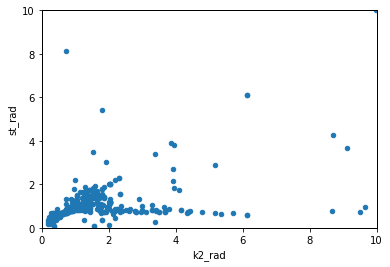

In [24]:
df_all.plot(x='k2_rad',y='st_rad',kind='scatter')
pl.ylim(0,10)
pl.xlim(0,10)

radius_value came from [gaia](https://www.cosmos.esa.int/web/gaia/iow_20130911); R* came from Mayo+18

(0, 10)

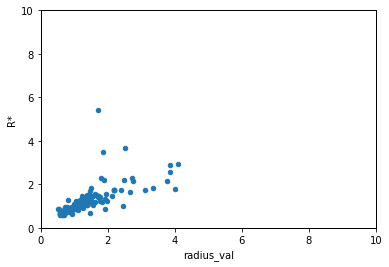

In [25]:
df_all.plot(x='radius_val',y='R*',kind='scatter')
pl.ylim(0,10)
pl.xlim(0,10)

## Adding constraints

Kepler confirmed+candidates
* without planet mass measurement, 
* bright (Mv<14), 
* low FPP (fpp<0.5)
* large depth (d>1mmag), 
* large expected K>1m/s, 
* period < 50 d
* t23/t14 > 0.5

In [26]:
def inclination(a, b, e=None, w=None):
    """
    Winn 2014 ("Transits and Occultations"), eq. 7
    """
    # if e is None and w is None:
    #     return np.arccos(b / a)
    # elif e is not None and w is not None:
    #     return np.arccos(b / a * (1 + e * np.sin(w)) / (1 - e**2))
    # else:
    #     return np.nan
    return np.arccos(b / a)

def t14_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 14
    """
    i = inclination(a, b)
    alpha = np.sqrt( (1 + k)**2 - b**2 )
    return (p / np.pi) * np.arcsin( alpha / np.sin(i) / a )


def t23_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 15
    """
    i = inclination(a, b)
    alpha = np.sqrt( (1 - k)**2 - b**2 )
    return (p / np.pi) * np.arcsin( alpha / np.sin(i) / a )


def tau_circ(p, a, k, b):
    """
    Winn 2014 ("Transits and Occultations"), eq. 18
    """
    return p / np.pi / a * k / np.sqrt(1 - b**2)


def tshape_approx(a, k, b):
    """
    Seager & Mallen-Ornelas 2003, eq. 15
    """
    i = inclination(a, b)
    alpha = (1 - k)**2 - b**2
    beta = (1 + k)**2 - b**2
    return np.sqrt( alpha / beta )


def max_k(tshape):
    """
    Seager & Mallen-Ornelas 2003, eq. 21
    """
    return (1 - tshape) / (1 + tshape)

Convert FPP limits to normal values so a mask (<50%) can be evaluated. 
Also use reported value in NExSci if Mayo+2018 value is unknown.

In [27]:
fpp = []
for idx in df_all.index:
    i= df_all.loc[idx,'FPP']
    if type(i)==str:
        if i[0]=='<':
            i=float(i[1:])
        else:
            i=float(i)
    elif type(i)==float:
        #np.nan
        #pass
        i=df_all.loc[idx,'pl_fppprob']
    else:
        #report some other value
        print(i)
    fpp.append(i)
    
df_all['fpp'] = fpp

In [28]:
df_all[['FPP','pl_fppprob']].head()

,FPP,pl_fppprob
0,1.22E-03,NaN
1,NaN,0.00122
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


Upon checking, there is no discrepancy in fpp prob reported in NExSci because its main source for fpp is Mayo+2018 too.

In [29]:
df_all['fpp'].dropna().shape

(487,)

In [30]:
k = df_all['Rp/R*'] #['pl_ratror']
a = df_all['a/R*'] #['pl_ratdor']
b = df_all['pl_imppar'].fillna(0) #assumes circular orbit
p = df_all['P']
#t14 = df_all['pl_trandur']

#if trandur is not reported, calculate it
t14 =[]
for n,idx in enumerate(df_all.index):
    if np.isnan(df_all.loc[idx,'pl_trandur']):
        t14.append(t14_circ(p[n], a[n], k[n], b[n])*24) #assumes circular orbit
    else:
        t14.append(df_all.loc[idx,'pl_trandur'])

df_all['t23_hr'] = t23_circ(p, a, k, b)*24
tshape = df_all['t23_hr']/t14
#tshape = tshape_approx(a, k, b)
df_all['shape'] = tshape
df_all['max_k'] = max_k(tshape)

df_all['shape'].dropna().shape

(339,)

In [31]:
#compare reported and calculated transit durations
np.c_[tshape,df_all['t23_hr']/t14]

array([[ 0.9666928 ,  0.9666928 ],
       [        nan,         nan],
       [        nan,         nan],
       ..., 
       [        nan,         nan],
       [ 0.94273117,  0.94273117],
       [        nan,         nan]])

In [32]:
for i in 'Rp/R*,a/R*,pl_imppar,P'.split(','):
    print(df_all[i].dropna().shape)

(339,)
(339,)
(508,)
(339,)


In [52]:
df_all['trandep']=df_all['Rp/R*']**2

In [58]:
low_fpp = df_all['fpp'] < 0.5 #df_all['pl_fpprob]
cand    = df_all['k2c_disp_x'] != 'CONFIRMED'
bright  = df_all['Kpmag'] < 12.0
boxy    = df_all['shape'] > 0.5
long_period = df_all['P'] < 40
nearby  = df_all['parallax'] > 1 #mas
deep   = df_all['trandep'] > 1e-3

idx = low_fpp & cand & bright & long_period & nearby & boxy & deep

df = df_all[idx]
df.shape

(4, 238)

In [59]:
#selected
#df = df.drop_duplicates(['epic_number','P'])
df.shape

(4, 238)

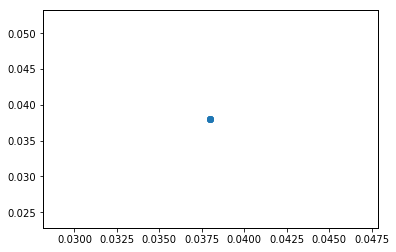

In [60]:
pl.scatter(df['Rp/R*'],df['max_k'])

In [61]:
from astropy import units as u

df['Rp_earth']=(df['Rp/R*']*df['R*'])*u.Rsun.to(u.Rearth)

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:

cols = 'epic_number,Kpmag,radius_val,R*,M*,FPP,parallax,parallax_error,P,Rp/R*,max_k,Rp_earth,shape,k2c_disp_x'.split(',')
selected=df[idx][cols].sort_values(by='Rp_earth')
selected

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,epic_number,Kpmag,radius_val,R*,M*,FPP,parallax,parallax_error,P,Rp/R*,max_k,Rp_earth,shape,k2c_disp_x
920,211945201,10.115,1.4,1.41,1.143,1.64E-01,5.4753,0.0387,19.49179,0.038,0.038008,5.844312,0.926767,CANDIDATE
925,211945201,10.115,1.4,1.41,1.143,1.64E-01,5.4753,0.0387,19.49179,0.038,0.038008,5.844312,0.926767,CANDIDATE
930,211945201,10.115,1.4,1.41,1.143,1.64E-01,5.4753,0.0387,19.49179,0.038,0.038008,5.844312,0.926767,CANDIDATE
935,211945201,10.115,1.4,1.41,1.143,1.64E-01,5.4753,0.0387,19.49179,0.038,0.038008,5.844312,0.926767,CANDIDATE


In [43]:
selected.shape

(22, 12)

In [42]:
save=True
if save:
    selected.to_csv('K2_candidate_shortlist.csv')

In [38]:
def unc_ave(mid,upper,lower):
    return (abs(mid-upper)+abs(mid-lower))/2

In [39]:
cols = 'epic_number,teff_prov,logg_prov,feh_prov,teff,uteff,logg,ulogg,feh,ufeh,koi_jmag,koi_jmag_err,koi_hmag,koi_hmag_err,koi_kmag,koi_kmag_err,parallax,parallax_error,radial_velocity,radial_velocity_error,FPP,planet?,koi_kepmag,koi_period_y,koi_depth_y,shape,cks_svsini,mass,radius,rho_star'.split(',')

#save
df[idx][cols]
#.to_csv('kepler_candidates.csv')

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


KeyError: "['teff_prov' 'logg_prov' 'feh_prov' 'teff' 'uteff' 'logg' 'ulogg' 'feh'\n 'ufeh' 'koi_jmag' 'koi_jmag_err' 'koi_hmag' 'koi_hmag_err' 'koi_kmag'\n 'koi_kmag_err' 'planet?' 'koi_kepmag' 'koi_period_y' 'koi_depth_y'\n 'cks_svsini' 'mass' 'radius' 'rho_star'] not in index"